In [371]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [372]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [373]:
df.shape

(346, 10)

In [374]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [375]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

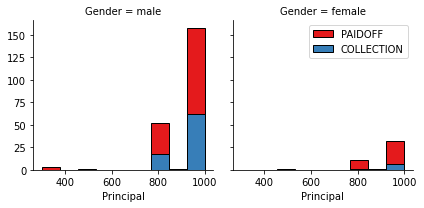

In [376]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

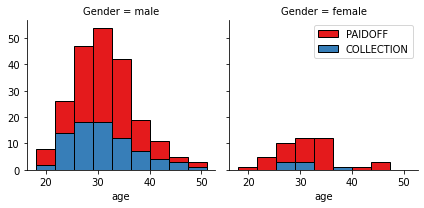

In [377]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

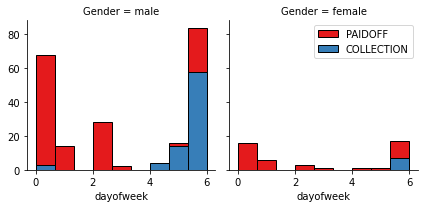

In [378]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [379]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [380]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [381]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [382]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [383]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [384]:
df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,1,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,1,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,1,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,1,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [385]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [386]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [387]:
y = df['loan_status'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [388]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [389]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train, y_test =tts(X,y,test_size=0.2,random_state=4) 
X_train[:5]
y_train[:5]

array([1, 0, 1, 1, 1], dtype=int64)

# KNN

### Choosing the best value of K by hit and try.

In [390]:
list1=[]
list2=[]
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import metrics
for k in range(2,15):
    neigh = KNN(n_neighbors=k).fit(X_train,y_train)
    y_pred = neigh.predict(X_test)
    list1.append("{}: {}".format(k,metrics.accuracy_score(y_test,y_pred)))
    list2.append(f"{k}: { metrics.accuracy_score(y_train,neigh.predict(X_train))}")
print("For the train set: /n",list2)
print("For the test set: /n",list1)

For the train set: /n ['2: 0.822463768115942', '3: 0.8333333333333334', '4: 0.8152173913043478', '5: 0.8152173913043478', '6: 0.8007246376811594', '7: 0.8079710144927537', '8: 0.7971014492753623', '9: 0.7898550724637681', '10: 0.7753623188405797', '11: 0.7898550724637681', '12: 0.782608695652174', '13: 0.7789855072463768', '14: 0.7681159420289855']
For the test set: /n ['2: 0.6571428571428571', '3: 0.7142857142857143', '4: 0.6857142857142857', '5: 0.7571428571428571', '6: 0.7142857142857143', '7: 0.7857142857142857', '8: 0.7571428571428571', '9: 0.7571428571428571', '10: 0.6714285714285714', '11: 0.7', '12: 0.7285714285714285', '13: 0.7', '14: 0.7']


### Choosing the best value of K graphically.

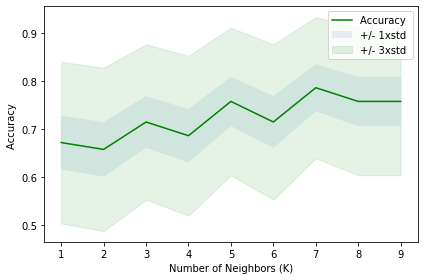

In [391]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    neigh = KNN(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [392]:
k=7
neigh = KNN(n_neighbors=k).fit(X_train,y_train)
neigh
y_pred = neigh.predict(X_test)
y_pred[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [393]:
clf = KNN(7)
clf.fit(X_train,y_train)
y_score = clf.predict_proba(X_test)[:,1]
y_score

array([0.57142857, 0.57142857, 1.        , 0.85714286, 1.        ,
       1.        , 0.42857143, 0.14285714, 0.85714286, 0.71428571,
       0.85714286, 0.57142857, 1.        , 1.        , 0.57142857,
       1.        , 0.57142857, 1.        , 0.57142857, 1.        ,
       0.71428571, 0.57142857, 0.28571429, 0.71428571, 0.85714286,
       0.42857143, 0.28571429, 0.85714286, 0.71428571, 0.85714286,
       0.42857143, 0.71428571, 0.71428571, 0.85714286, 1.        ,
       0.42857143, 0.57142857, 1.        , 0.71428571, 0.85714286,
       0.42857143, 1.        , 0.71428571, 0.42857143, 1.        ,
       0.57142857, 0.57142857, 0.57142857, 0.42857143, 0.57142857,
       1.        , 0.71428571, 1.        , 0.57142857, 1.        ,
       0.71428571, 1.        , 0.71428571, 0.42857143, 1.        ,
       0.71428571, 0.85714286, 0.42857143, 0.57142857, 1.        ,
       0.57142857, 0.85714286, 0.71428571, 0.57142857, 1.        ])

### Graphically Representing the results.

In [394]:
import plotly.express as px
fig = px.scatter(X_test,
    color=y_score, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
    )
fig.update_traces(marker_size=7, marker_line_width=1)
fig.update_layout(legend_orientation='h')
fig.show()

## Decision Tree

In [395]:
from sklearn.tree import DecisionTreeClassifier as dtc 

In [396]:
tree = dtc(criterion='entropy')
tree.fit(X_train,y_train)
predtree = tree.predict(X_test)
print(predtree[:5])
print(y_test[:5])

[1 1 1 1 1]
[1 1 1 1 1]


In [397]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predtree))

DecisionTrees's Accuracy:  0.7


## SVM

In [398]:
from sklearn import svm
clf1 = svm.SVC(kernel='poly')
clf1.fit(X_train, y_train)
yhat = clf1.predict(X_test)
yhat [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

# Logistic Regression

In [399]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='saga').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='saga')

In [400]:
yhatLR = LR.predict(X_test)
yhatLR

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [401]:
yhatLR_prob = LR.predict_proba(X_test)
yhatLR_prob

array([[0.3468497 , 0.6531503 ],
       [0.29470949, 0.70529051],
       [0.17787895, 0.82212105],
       [0.20143578, 0.79856422],
       [0.18315034, 0.81684966],
       [0.18487475, 0.81512525],
       [0.33101511, 0.66898489],
       [0.32066474, 0.67933526],
       [0.20143578, 0.79856422],
       [0.33057357, 0.66942643],
       [0.19767248, 0.80232752],
       [0.33344015, 0.66655985],
       [0.13571737, 0.86428263],
       [0.20539098, 0.79460902],
       [0.28082996, 0.71917004],
       [0.14086465, 0.85913535],
       [0.36849624, 0.63150376],
       [0.17097188, 0.82902812],
       [0.33869706, 0.66130294],
       [0.18683051, 0.81316949],
       [0.27688263, 0.72311737],
       [0.33082704, 0.66917296],
       [0.35760036, 0.64239964],
       [0.31126661, 0.68873339],
       [0.24925709, 0.75074291],
       [0.35220632, 0.64779368],
       [0.35489873, 0.64510127],
       [0.22560018, 0.77439982],
       [0.34134062, 0.65865938],
       [0.13088147, 0.86911853],
       [0.

# Model Evaluation using Test set

In [402]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

## For KNN

In [403]:
jaccard_score(y_test, y_pred)

0.765625

In [404]:
f1_score(y_test, y_pred)

0.8672566371681416

## For Decision Tree

In [405]:
jaccard_score(y_test, predtree,pos_label=1)

0.6666666666666666

In [406]:
f1_score(y_test, predtree)

0.8000000000000002

## For SVM

In [407]:
jaccard_score(y_test, yhat,pos_label=1)

0.7681159420289855

In [408]:
f1_score(y_test, yhat)

0.8688524590163933

## For Logistic Regression

In [409]:
jaccard_score(y_test, yhatLR)

0.7857142857142857

In [410]:
f1_score(y_test, yhatLR)

0.88

In [411]:
from sklearn.metrics import log_loss
log_loss(y_test, yhatLR_prob)


0.4920176349432059

# Load Test set for evaluation

In [412]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [413]:
test_df.shape

(54, 10)

In [414]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [415]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [416]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [417]:
test_df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,1,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,1,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,1,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,1,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,1,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [418]:
Feature1 = test_df[['Principal','terms','age','Gender','weekend']]
Feature1 = pd.concat([Feature1,pd.get_dummies(test_df['education'])], axis=1)
Feature1.drop(['Master or Above'], axis = 1,inplace=True)
Feature1.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [419]:
X1 = Feature1
X1[0:5]
X1.shape

(54, 8)

In [420]:
y1 = test_df['loan_status'].values
y1[0:5]
y1.shape

(54,)

In [421]:
X1= preprocessing.StandardScaler().fit(X1).transform(X1)
X1[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

## Testing for KNN

In [422]:
y_pred1 = neigh.predict(X1)
y_pred1[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [423]:
a = jaccard_score(y1, y_pred1)

In [424]:
b = f1_score(y1, y_pred1)

## Testing for Decision Tree

In [425]:
predtree1 = tree.predict(X1)

In [426]:
c = jaccard_score(y1, predtree1,pos_label=1)

In [427]:
d = f1_score(y1,predtree1)

## Testing for SVM

In [428]:
yhat1 = clf1.predict(X1)

In [429]:
e = jaccard_score(y1, yhat1)

In [430]:
f = f1_score(y1,yhat1)

## Testing for Logistic Regression

In [431]:
yhatLR1 = LR.predict(X1)

In [432]:
g = jaccard_score(y1, yhatLR1)

In [433]:
h = f1_score(y1,yhatLR1)

In [434]:
yhatLR_prob1 = LR.predict_proba(X1)

In [435]:
j = log_loss(y1,yhatLR_prob1)

# Report

In [436]:
data = [["KNN",a,b,"NA"],["Decision Tree",c,d,"NA"],["SVM",e,f,"NA"],["Logistic Regression",g,h,j]]

In [437]:
report = pd.DataFrame(data, columns = ['Algorithm','Jaccard','F1-Score','Log-Loss'])
report

,Algorithm,Jaccard,F1-Score,Log-Loss
0,KNN,0.653846,0.790698,NA
1,Decision Tree,0.680851,0.810127,NA
2,SVM,0.750000,0.857143,NA
3,Logistic Regression,0.740741,0.851064,0.516366


# Conclusion

In [438]:
print("SVM Classifier will be the best classifier for the given data-set.")

SVM Classifier will be the best classifier for the given data-set.
